<a href="https://colab.research.google.com/github/G-Vida/Machine_Learning/blob/main/Exercise_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLME: colab introduction and linear regression

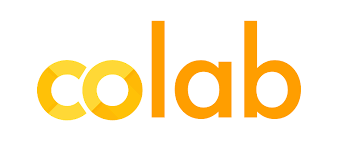 <p>
During this course, we will use the Python language and some tools, such as PyTorch. For the excercises and projects we will rely on Colab, an environment that allows to play with python notebooks directly in your web browser, made by Google.

[Welcome to Colab](https://colab.research.google.com/), a Colab tutorial.



In Colab, you can create or import Jupiter notebooks. Colab notebooks are stored in your Google Drive, or can be loaded from GitHub.
Colab allows you to save your work to your Google Drive. To save your notebook, select the following menu options
> File / Save a copy in Drive…

![img](https://www.tutorialspoint.com/google_colab/images/saving_google_drive.jpg)



## Packages
Colab comes with several packages already available for use. Today, we will use a few common packages:

#### **NumPy**
<img src="https://numpy.org/images/logo.svg" width="60"> <p>
[NumPy](https://numpy.org/) is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. As we will see during this course, modern deep learning frameworks (and especially PyTorch) have drawn largely from Numpy's API, while at the same time overcoming its limitations such as the absence of GPU support or automatic differentiation.

#### **Matplotlib**
<img src="https://matplotlib.org/_static/logo_light.svg" width="120"> <p>
[Matplotlib](https://matplotlib.org/) is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

#### **Scikit-learn**
<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" width="120"> <p>
[scikit-learn](https://scikit-learn.org/stable/) is a free and open-source machine learning library for the Python programming language.

## **Linear Regression**

In Linear Regression, we try to find a mapping between the input (regressors) and the observed outcomes (predictions or labels) using a straight-line model:
$$
y = ax + b
$$

$a$ models the slope of the line, and $b$ is the offset at $x=0$ (intercept or bias).

We will try to play around with this task, and see if we can estimate the parameters a and b to fit a set of data points. Let's start with some basic imports.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

print(5)

5


### Generate the data points

To fit the model, we need data. Let's assume that the data is produced by the following noisy process
$$
y_i =  \overline{a} \;  x_i + \overline{b} + \epsilon_i  
$$
where $\epsilon_i$ is noise.

We can sample datapoints from this process, to later fit our model.

In the following code, we will chose:
*   The real slope of the generator process $\overline{a}$.
*   The real bias of the generator process $\overline{b}$.
*   The variance of the noise.
*   The number of datapoints to generate.
*   The range for sampling the data domain, so that $x_{min} \leq x \leq x_{max}$



[9.72012112 7.89658435 9.99907105 4.5404711  5.52739448 8.17888693
 9.97519008 5.21442884 3.95581206 5.68786007 5.24363498 5.56490327
 7.96756094 9.30099701 6.73880807 4.73105635 7.70264594 6.93210375
 6.79791914 9.25413323 8.89945685 5.14208813 7.41818844 7.76167202
 9.79299292 9.25497006 9.59698103 7.49557837 7.30253344 4.59378278
 6.40222308 8.6505351  8.90954107 6.74276606 8.30458635 6.4977382
 8.95229528 7.33787743 9.03129925 4.62188038 5.8155289  7.37062544
 4.00125694 3.85958939 5.91780938 6.89818087 9.58993423 5.86481316
 8.15726015 9.96815472 9.41665044 3.01416291 9.79932185 9.22333724
 7.89642024 3.68267268 7.01400327 8.74025981 6.92623735 5.45533723
 6.80449829 9.15712364 3.79867595 3.22007164 9.66967042 5.02120432
 6.0936442  4.81315073 7.17824011 7.58700232 4.92986822 9.00580721
 9.22106902 4.99542414 7.61692293 9.80484182 8.57811879 4.25625081
 8.49271085 9.79089522 5.53968238 3.61520245 5.40683397 6.99776752
 4.15858878 7.42131157 3.45895875 9.39011934 3.62057785 4.39571

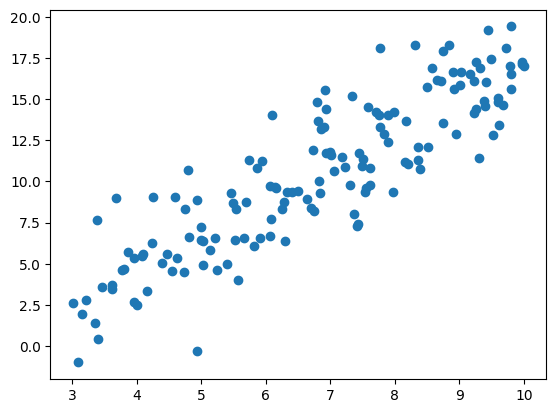

In [ ]:
#Parameters to generate the data
seed = 24 #used for the generations of random numbers
a_true = 2 #slope
b_true = -3 #bias
N_points = 150 #number of points to be sampled
x_min = 3
x_max = 10
noise_var = 2.5
noise_mean = 0.0

#Sample the data
rng = np.random.RandomState(seed) #We use Numpy's random numbers generators
x = (rng.rand(N_points)  * (x_max-x_min) ) + x_min
y = a_true * x + b_true + rng.normal(noise_mean, noise_var, N_points) #we sample the noise from a normal distribution

#plot the data
plt.scatter(x, y);

print(x)

### Computing the MSE

Let's now pick for our models some values for $a$ and $b$. At this moment, we do not care about optimizing them. What we want to do first, is to establish a way to compute the MSE (mean-squared error) of this model with respect to the given data.

In [ ]:
def linear_model_prediction(x, a, b):
  """
  Function that computes the prediction of a linear model with parameters a and b, given the data x
  """
  return a*x + b


def MSE(x, y, a, b):
  """
  Function that computes the MSE error of a linear model with parameters a and b, given the data x and y
  """
  y_hat = linear_model_prediction(x, a, b)
  return np.mean((y - y_hat)**2)


# Let's test these functions
a_guessed = 1.5
b_guessed = -2
print("Real Model: ", a_true, "x ", b_true)
print("Real Model MSE = ", MSE(x, y, a_true, b_true), "\n")
print("Guessed Model: ", a_guessed, "x ", b_guessed)
print("Guessed Model MSE = ", MSE(x, y, a_guessed, b_guessed))

Real Model:  2 x  -3
Real Model MSE =  5.009791212879998 

Guessed Model:  1.5 x  -2
Guessed Model MSE =  11.54855375050372


Let's also plot the guessed model overlaying it to the data.

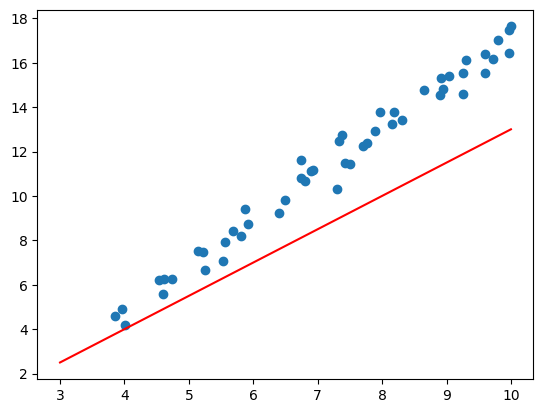

In [ ]:
#plot the original data
plt.scatter(x, y)


# we plot the guessed line, taking predictions at 500 points, from x_min to x_max
x_fit = np.linspace(x_min, x_max, 500)
y_fit = linear_model_prediction(x_fit, a_guessed, b_guessed)
plt.plot(x_fit, y_fit, 'r-');

### Model Optimization

Now, let's estimate the best parameters for our model, using the closed form solution

$$
 \theta^* = (Z^T Z)^{-1} Z^T y
$$

where


*   $\theta = (b \; a)^T$ is the vector of parameters;
*   $Z = \begin{pmatrix}1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{pmatrix}$ are the extended regressors;
*   $y = \begin{pmatrix} y_i \\ \vdots \\y_n \end{pmatrix}$ is the vector of the observations (_labels_) corresponding to the regressors.


**Question**
What is the size of these variables?




In [ ]:
# @title Variables
Z = np.column_stack( (np.ones_like(x), x))    #Function that creates a vector of ones of the same size of x
print("The shape of Z is", Z.shape)
print("The shape of y is", y.shape)
print(Z)
print(y)


The shape of Z is (150, 2)
The shape of y is (150,)
[[1.         9.72012112]
 [1.         7.89658435]
 [1.         9.99907105]
 [1.         4.5404711 ]
 [1.         5.52739448]
 [1.         8.17888693]
 [1.         9.97519008]
 [1.         5.21442884]
 [1.         3.95581206]
 [1.         5.68786007]
 [1.         5.24363498]
 [1.         5.56490327]
 [1.         7.96756094]
 [1.         9.30099701]
 [1.         6.73880807]
 [1.         4.73105635]
 [1.         7.70264594]
 [1.         6.93210375]
 [1.         6.79791914]
 [1.         9.25413323]
 [1.         8.89945685]
 [1.         5.14208813]
 [1.         7.41818844]
 [1.         7.76167202]
 [1.         9.79299292]
 [1.         9.25497006]
 [1.         9.59698103]
 [1.         7.49557837]
 [1.         7.30253344]
 [1.         4.59378278]
 [1.         6.40222308]
 [1.         8.6505351 ]
 [1.         8.90954107]
 [1.         6.74276606]
 [1.         8.30458635]
 [1.         6.4977382 ]
 [1.         8.95229528]
 [1.         7.33787743

In [ ]:
# @title Optimization

M = np.matmul(Z.T,  Z)     # matmul is the moltiplication between 2 matrices
Minv = np.linalg.inv(M)    # then we do the inversion
theta = np.matmul(Minv, np.matmul(Z.T, y))     # then we multiply again

a_estimate = theta[1]
b_estimate = theta[0]

print("True a = ", a_true)
print("True b = ", b_true)
print("True Model MSE = ", MSE(x, y, a_true, b_true), "\n")

print("Estimated a = ", a_estimate)
print("Estimated b = ", b_estimate)
print("Estimated Model MSE = ", MSE(x, y, a_estimate, b_estimate), "\n")


MSE(x, y, theta[1], theta[0])

True a =  2
True b =  -3
True Model MSE =  5.009791212879998 

Estimated a =  2.0922406357627796
Estimated b =  -3.7380887797270326
Estimated Model MSE =  4.964476053369067 



4.964476053369067

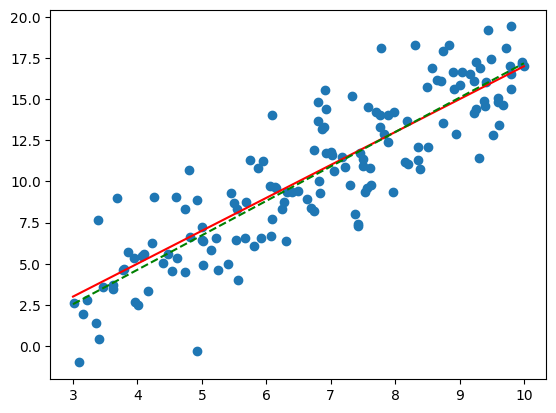

In [ ]:
# @title Plot results

#plot the data
plt.scatter(x, y)

# sample the range [x_min, x_max] and compute the predictions using the estimated parameters
x_fit = np.linspace(x_min, x_max, 500)
y_fit = linear_model_prediction(x_fit, theta[1], theta[0])

# let's compute also the predictions using the real parameters, to compare to the real model
y_fit_true = linear_model_prediction(x_fit, a_true, b_true)

# plot the estimated and real models
plt.plot(x_fit, y_fit_true, 'r-'); #real
plt.plot(x_fit, y_fit, 'g--'); #estimated

### Solving the problem using Scikit-Learn



We solved the linear regression problem doing all the computations ourselves. We could have also used Scikit-Learn's builtin `LinearRegression` estimator to solve the problem.
Please check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) for this function.

Let's give it a try.

In [ ]:
from sklearn.linear_model import LinearRegression #import from the library

# fit a linear model using scikit-learn
model = LinearRegression(fit_intercept=True) #fit_intercept = True means that we also want to estimate the bias
model.fit(x[:, np.newaxis], y) #


#print parameters and MSE
print("True a = ", a_true)
print("True b = ", b_true)
print("True Model MSE = ", MSE(x, y, a_true, b_true), "\n")

print("Scikit a = ", model.coef_[0])
print("Scikit b = ", model.intercept_)
print("Scikit Model MSE = ", MSE(x, y, model.coef_[0], model.intercept_), "\n")


print("Estimated a = ", a_estimate)
print("Estimated b = ", b_estimate)
print("Estimated Model MSE = ", MSE(x, y, a_estimate, b_estimate), "\n")


True a =  2
True b =  -3
True Model MSE =  5.009791212879998 

Scikit a =  2.0922406357627894
Scikit b =  -3.7380887797271107
Scikit Model MSE =  4.964476053369067 

Estimated a =  2.0922406357627796
Estimated b =  -3.7380887797270326
Estimated Model MSE =  4.964476053369067 



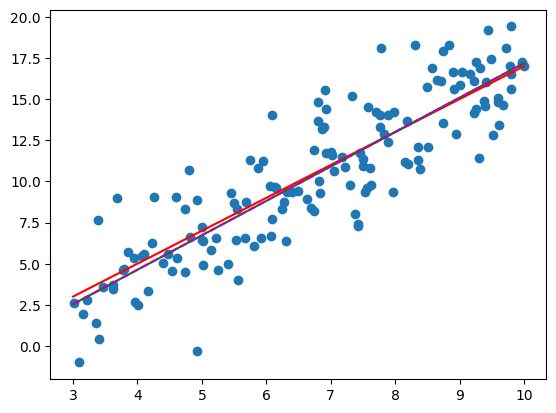

In [ ]:
from sklearn.linear_model import LinearRegression #import from the library

# fit a linear model using scikit-learn
model = LinearRegression(fit_intercept=True) #fit_intercept = True means that we also want to estimate the bias
model.fit(x[:, np.newaxis], y) #


# sample the range [x_min, x_max] and compute the predictions using the estimated parameters
x_fit = np.linspace(x_min, x_max, 500)

y_fit_scikit = model.predict(x_fit[:, np.newaxis]) #scikit-learn solution
y_fit = linear_model_prediction(x_fit, theta[1], theta[0]) #our manually computed solution
y_fit_true = linear_model_prediction(x_fit, a_true, b_true) #predictions from the true model

# plot the estimated and real models
plt.scatter(x, y)
plt.plot(x_fit, y_fit_true, 'r-'); #real
plt.plot(x_fit, y_fit, 'g'); #estimated
plt.plot(x_fit, y_fit_scikit, 'm--'); #scikit

### Linear Regression Extensions

The `LinearRegression` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyperplane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.]) #simple model without noise

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from a linear combination of three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single `LinearRegression` estimator to fit lines, planes, or hyperplanes to our data.

## **Polynomial Regression**

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the model according to *basis functions*.
In the linear regression, we tried to fit the data using a model in the form
$$
y = ax + b
$$

Switching to a model in the form
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
we obtain a polynomial regressor. A Polynomial model allows us to model a nonlinear mapping between the regressors $x$ and the predictions $y$.

Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Data

This time around, we will start by using some data that is already given to us. In other words, we have no knowledge of the process that originated the data.

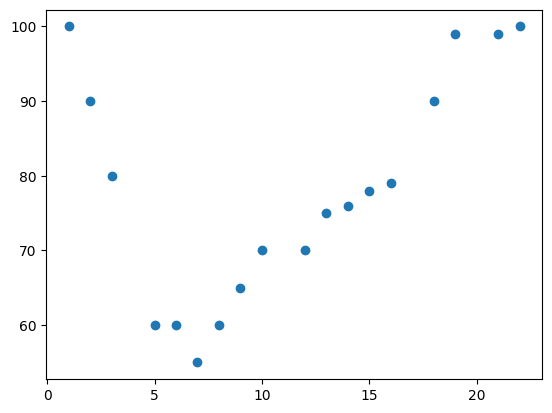

In [ ]:
x = np.array([1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22],dtype=np.float64)
y = np.array([100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100],dtype=np.float64)

plt.scatter(x, y)

In [ ]:
# @title Model

#Let's make a very basic polynomial class
# We could have used numpy's builtin Polynomials, or also avoid using a class.
class poly_model:
  def __init__(self, degree: int):
     self.degree = degree
     self.a = np.zeros(degree+1)

  def random_init(self):
    self.a = np.random.random(self.degree+1)/100

  def predict(self, x):
      """
      Function that computes the prediction of a linear model with parameters a and b, given the data x
      """
      y = np.zeros_like(x)
      for i in range(self.degree+1):
          y += self.a[i] * np.power(x, i)
      return y


def MSE(x, model):
  """
  Function that computes the MSE error of a linear model with parameters a and b, given the data x and y
  """
  y_hat = model.predict(x)
  return np.mean((y - y_hat)**2)


# Let's test these functions
my_model = poly_model(3) #create the model
my_model.random_init() #initialize the model with random parameters

print("Guessed Model MSE = ", MSE(x, my_model))



Guessed Model MSE =  3985.288920528566


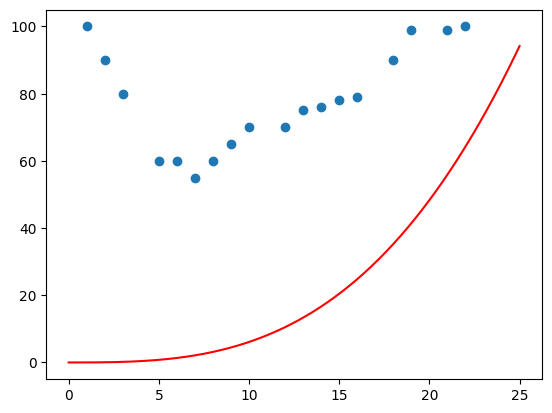

In [ ]:
#plot the original data
plt.scatter(x, y)


# we plot the guessed line, taking predictions at 500 points, from x_min to x_max
x_fit = np.linspace(0, 25, 500)
y_fit = my_model.predict(x_fit)
plt.plot(x_fit, y_fit, 'r-');

### Model Optimization

Now, let's estimate the best parameters for our model, using the closed form solution

$$
 \theta^* = (X^T X)^{-1} X^T y
$$

where


*   $\theta = \begin{pmatrix} a_0 \\ a_1 \\ \vdots \\ a_n\end{pmatrix}$ is the vector of parameters;
*   $X = \begin{pmatrix}1 & \cdots & x_1^n \\ \vdots & \cdots & \vdots \\ 1 & \cdots & x_k^n \end{pmatrix}$ are the extended regressors;
*   $y = \begin{pmatrix} y_i \\ \vdots \\y_k \end{pmatrix}$ is the vector of the observations (_labels_) corresponding to the regressors.




In [ ]:
# @title Optimization

#Let's make a very basic polynomial class
# We could have used numpy's builtin Polynomials, or also avoid using a class.
class poly_model:
  def __init__(self, degree: int):
     self.degree = degree
     self.a = np.zeros(degree+1)

  def random_init(self):
    self.a = np.random.random(self.degree+1)/100

  def predict(self, x):
      """
      Function that computes the prediction of a linear model with parameters a and b, given the data x
      """
      y = np.zeros_like(x)
      for i in range(self.degree+1):
          y += self.a[i] * np.power(x, i)
      return y

  def fit(self, x, y):
    """
    Function that optimizes the coefficients of the polynomial model
    """
    X = np.zeros((x.shape[0], self.degree+1))
    for i in range(X.shape[0]):
      for j in range(self.degree+1):
        X[i, j] = x[i]** j

    M = np.matmul(X.T,  X)
    Minv = np.linalg.inv(M)
    self.a = np.matmul(Minv, np.matmul(X.T, y))



# Let's test these functions
my_model = poly_model(3) #create the model
my_model.random_init() #initialize the model with random parameters
print("Random Model a = ", my_model.a)
print("Random Model MSE = ", MSE(x, my_model), "\n")


my_model.fit(x, y) #initialize the model with random parameters
print("Fit Model a = ", my_model.a)
print("Fit Model MSE = ", MSE(x, my_model), "\n")

Random Model a =  [0.00031066 0.00101599 0.00846017 0.00587089]
Random Model MSE =  3891.4840799930735 

Fit Model a =  [ 1.13768037e+02 -1.55383039e+01  1.34333191e+00 -3.03208795e-02]
Fit Model MSE =  12.473061469757209 



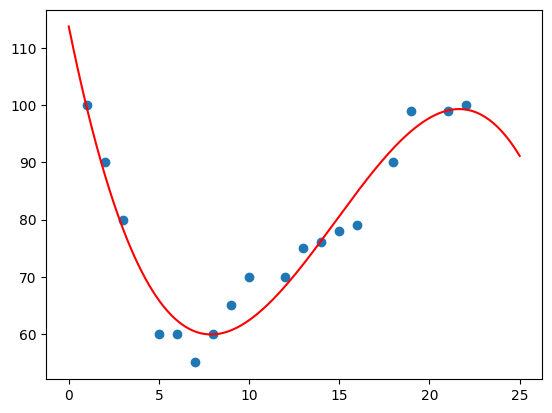

In [ ]:
# @title Visualize Results

#plot the original data
plt.scatter(x, y)

# we plot the fitted model, taking predictions at 500 points, from x_min to x_max
x_fit = np.linspace(0, 25, 500)
y_fit = my_model.predict(x_fit)
plt.plot(x_fit, y_fit, 'r-');

Degree 1 MSE =  179.60776695720335 

Degree 5 MSE =  9.4789594950797 

Degree 10 MSE =  3.531947399197045 



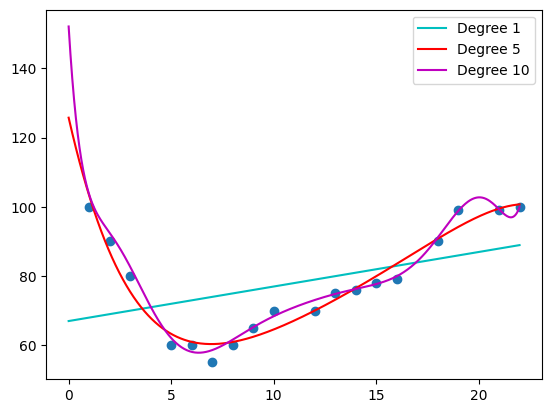

In [ ]:
# @title Trying different models


# Degree 1
my_model1 = poly_model(1) #create the model
my_model1.fit(x, y) #initialize the model with random parameters
print("Degree 1 MSE = ", MSE(x, my_model1), "\n")

# Degree 5
my_model5 = poly_model(5) #create the model
my_model5.fit(x, y) #initialize the model with random parameters
print("Degree 5 MSE = ", MSE(x, my_model5), "\n")

# Degree 10
my_model10 = poly_model(10) #create the model
my_model10.fit(x, y) #initialize the model with random parameters
print("Degree 10 MSE = ", MSE(x, my_model10), "\n")



#plot the original data
plt.scatter(x, y)

# we plot the fitted model, taking predictions at 500 points, from x_min to x_max
x_fit = np.linspace(0, 22, 500)


y_fit1 = my_model1.predict(x_fit)
y_fit5 = my_model5.predict(x_fit)
y_fit10 = my_model10.predict(x_fit)
plt.plot(x_fit, y_fit1, 'c-', label='Degree 1');
plt.plot(x_fit, y_fit5, 'r-', label='Degree 5');
plt.plot(x_fit, y_fit10, 'm-', label='Degree 10');

plt.gca().legend()

### Try with different data



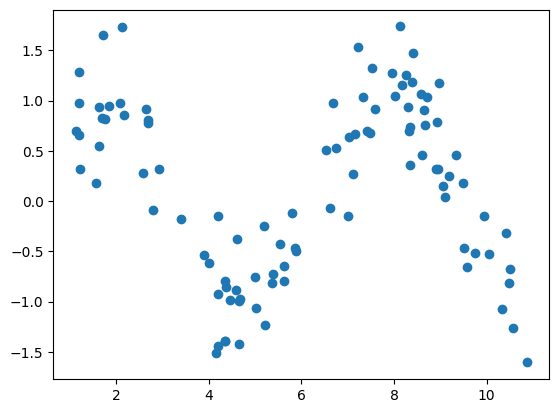

In [ ]:
#Parameters to generate the data
seed = 11 #used for the generations of random numbers
N_points = 100 #number of points to be sampled
x_min = 1
x_max = 11
noise_var = 0.4
noise_mean = 0.0

#Sample the data
rng = np.random.RandomState(seed) #We use Numpy's random numbers generators
x = (rng.rand(N_points)  * (x_max-x_min) ) + x_min
y = np.sin(x) + rng.normal(noise_mean, noise_var, N_points)

#plot the data
plt.scatter(x, y);

Degree 1 MSE =  0.7535572709217536 

Degree 5 MSE =  0.1328823420989655 

Degree 10 MSE =  0.11855437717079811 



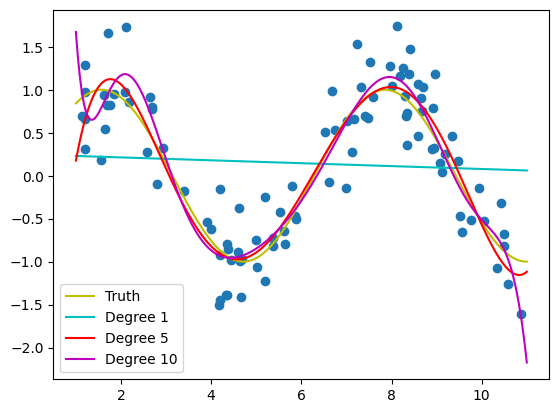

In [ ]:
# Degree 1
my_model1 = poly_model(1) #create the model
my_model1.fit(x, y) #initialize the model with random parameters
print("Degree 1 MSE = ", MSE(x, my_model1), "\n")

# Degree 5
my_model5 = poly_model(5) #create the model
my_model5.fit(x, y) #initialize the model with random parameters
print("Degree 5 MSE = ", MSE(x, my_model5), "\n")

# Degree 10
my_model10 = poly_model(10) #create the model
my_model10.fit(x, y) #initialize the model with random parameters
print("Degree 10 MSE = ", MSE(x, my_model10), "\n")



#plot the original data
plt.scatter(x, y)

# we plot the fitted model, taking predictions at 500 points, from x_min to x_max
x_fit = np.linspace(x_min, x_max, 500)

y_true = np.sin(x_fit)
y_fit1 = my_model1.predict(x_fit)
y_fit5 = my_model5.predict(x_fit)
y_fit10 = my_model10.predict(x_fit)
plt.plot(x_fit, y_true, 'y-', label='Truth');
plt.plot(x_fit, y_fit1, 'c-', label='Degree 1');
plt.plot(x_fit, y_fit5, 'r-', label='Degree 5');
plt.plot(x_fit, y_fit10, 'm-', label='Degree 10');

plt.gca().legend()

In [ ]:
# @title Compare with Scikit-Learn implemented methods

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Polynomial regression
poly = PolynomialFeatures(5, include_bias=True)
poly_features = poly.fit_transform(x[:, None])  # Transform x into polynomial features

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)  # Fit the model with polynomial features


# Plot
plt.scatter(x, y)
x_fit = np.linspace(x_min, x_max, 500)
x_fit_poly = poly.transform(x_fit[:, None])

y_true = np.sin(x_fit)
y_fit5 = my_model5.predict(x_fit)
y_fit_scikit  = poly_reg_model.predict(x_fit_poly)

plt.plot(x_fit, y_true, 'y-', label='Truth');
plt.plot(x_fit, y_fit5, 'r-', label='Degree 5 ours');
plt.plot(x_fit, y_fit_scikit, 'c--', label='Degree 5 scikit');

plt.gca().legend()